In [37]:
import numpy as np
from matplotlib import pyplot as plt
from torchvision import transforms as T
from torchvision.datasets import MNIST
import torch
from torch.utils.data import Dataset
from pathlib import Path
import pickle

In [12]:
transforms = T.Compose([
    T.Resize((28, 28)),
    T.ToTensor()
])

In [57]:
from PIL import Image

class JuxtaposedDataset(Dataset):
    def __init__(self, transforms, prefix=0) -> None:
        super().__init__()
        self.prefix = prefix
        self.mnist_dataset = MNIST("./", download=True)
        self.transforms = transforms

        juxtaposition_data_path = Path(f"./{prefix}_juxtapositions.pkl")
        if not juxtaposition_data_path.exists():
            self.generate_random_juxtapositions()
        self.juxtapositions = self.load_random_juxtapositions()


    def __len__(self):
        return len(self.juxtapositions)

    def __getitem__(self, index):
        p1, p2 = self.juxtapositions[index]
        combined_img = Image.new("L", (p1[0].width + p2[0].width, p1[0].height))
        combined_img.paste(p1[0], (0, 0))
        combined_img.paste(p2[0], (p1[0].width, 0))
        return self.transforms(combined_img), p1[1] * 10 + p2[1]

    def generate_random_juxtapositions(self):
        juxtapositions = []
        prefix_data = []
        for i in self.mnist_dataset:
            if i[1] == self.prefix:
                prefix_data.append(i)
        
        index = 0
        for i in self.mnist_dataset:
            if i[1] == self.prefix:
                continue
            juxtapositions.append((prefix_data[index], i))
            index = (index + 1) % len(prefix_data)

        with open(f"./{self.prefix}_juxtapositions.pkl", "wb") as f:
            pickle.dump(juxtapositions, f)


    def load_random_juxtapositions(self):
        with open(f"./{self.prefix}_juxtapositions.pkl", "rb") as f:
            data = pickle.load(f)
        return data


In [58]:
j_data = JuxtaposedDataset(transforms)

In [59]:
first_j_data = j_data[0]
img, number = first_j_data
number

5

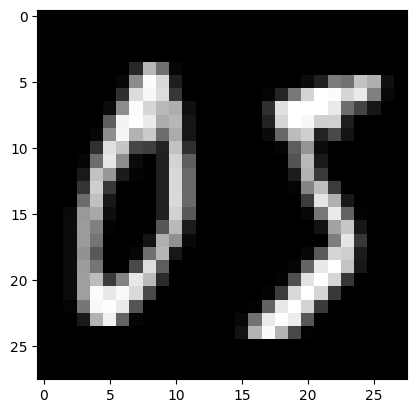

In [60]:
np_img = np.transpose(img.numpy(), (1,2,0))
plt.imshow(np_img, cmap=plt.cm.gray)

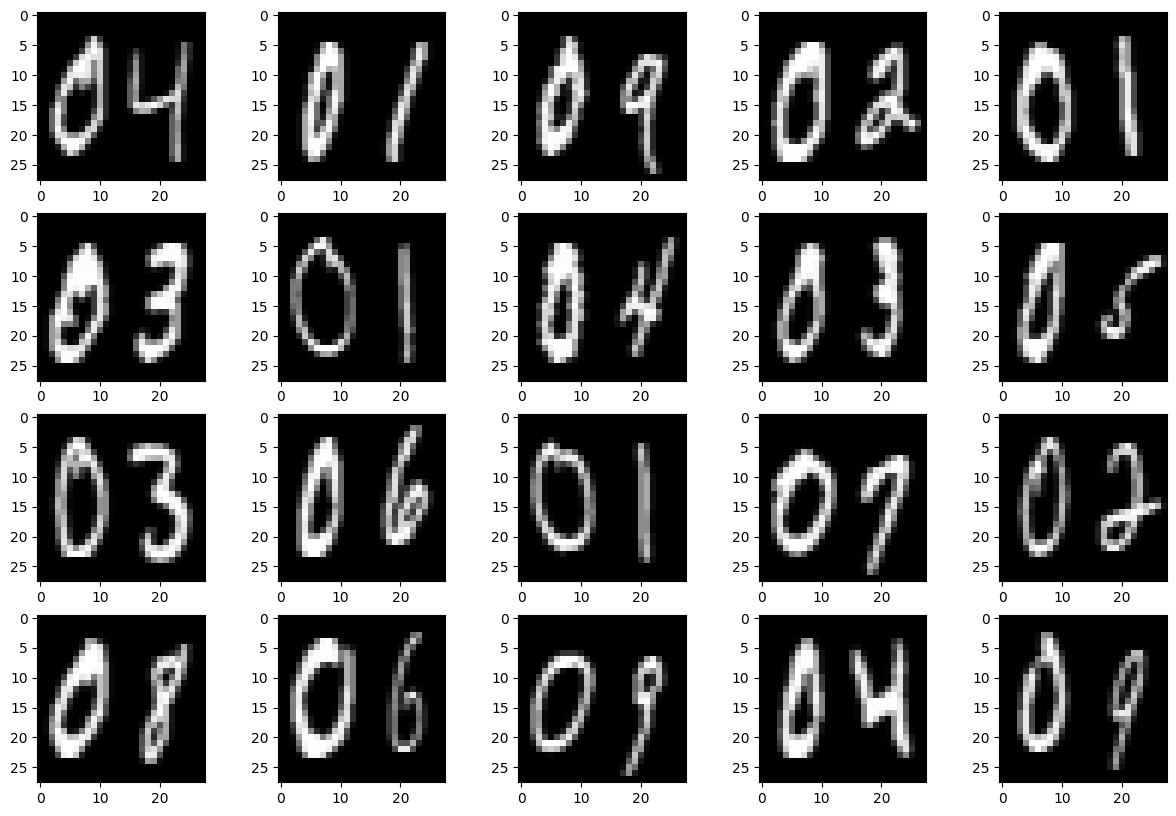

In [61]:
plt.figure(figsize=(15, 10))
for i in range(1, 21):
    plt.subplot(4, 5, i)
    np_img = np.transpose(j_data[i][0].numpy(), (1,2,0))
    plt.imshow(np_img, cmap=plt.cm.gray)

In [ ]:
t_data = TranslationDataset(transforms=transforms)

In [4]:
first_t_data = t_data[0]
img, label, translation = first_t_data
label, translation

(5, (1, 0, 0, 0, 1, 0))

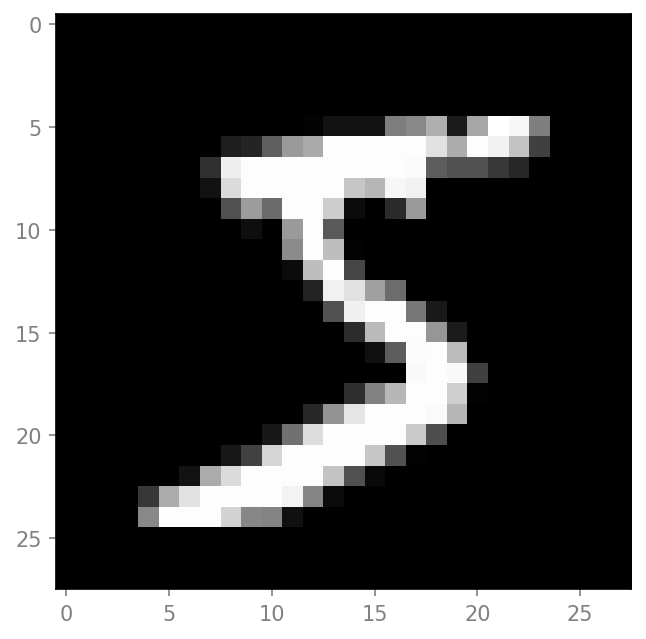

In [5]:
np_img = np.transpose(img.numpy(), (1,2,0))
plt.imshow(np_img, cmap=plt.cm.gray)

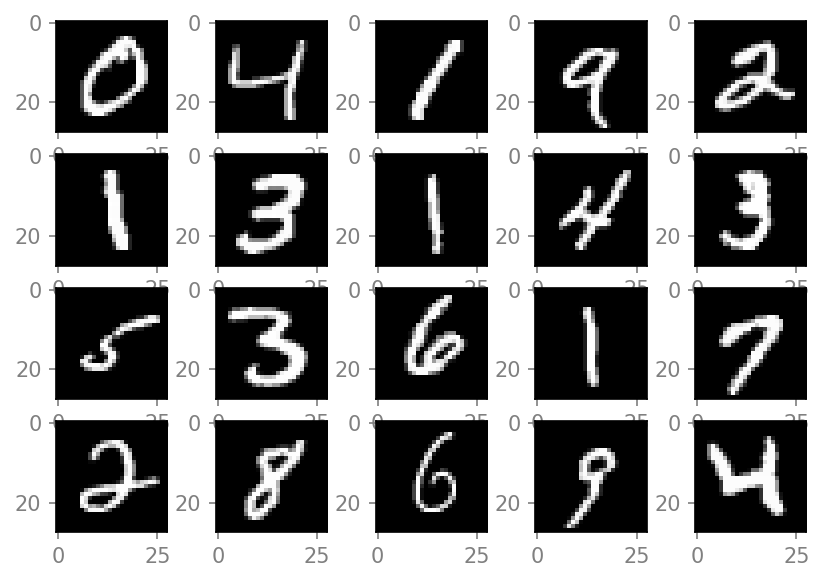

In [6]:
plt.figure(figsize=(15, 10))
for i in range(1, 21):
    plt.subplot(4, 5, i)
    np_img = np.transpose(t_data[i][0].numpy(), (1,2,0))
    plt.imshow(np_img, cmap=plt.cm.gray)

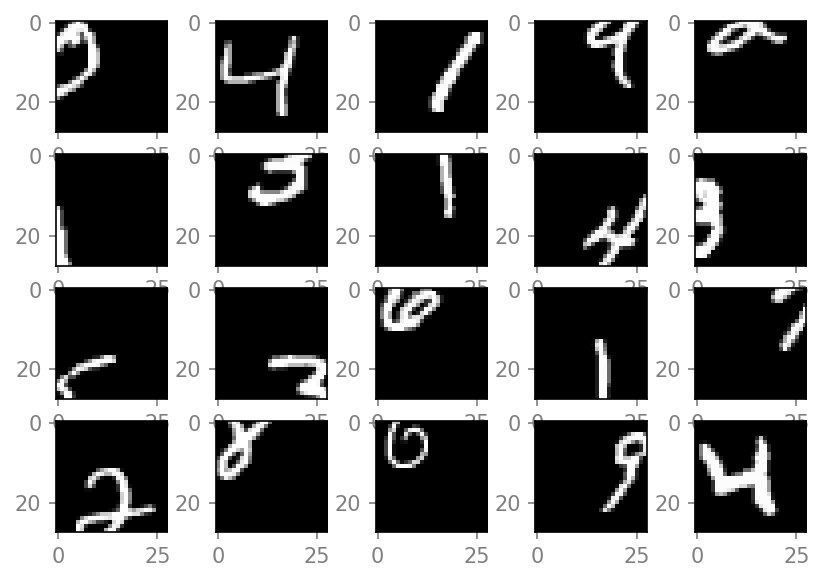

In [7]:
plt.figure(figsize=(15, 10))
for i in range(1, 21):
    plt.subplot(4, 5, i)
    np_img = np.transpose(t_data[60000 + i][0].numpy(), (1,2,0))
    plt.imshow(np_img, cmap=plt.cm.gray)

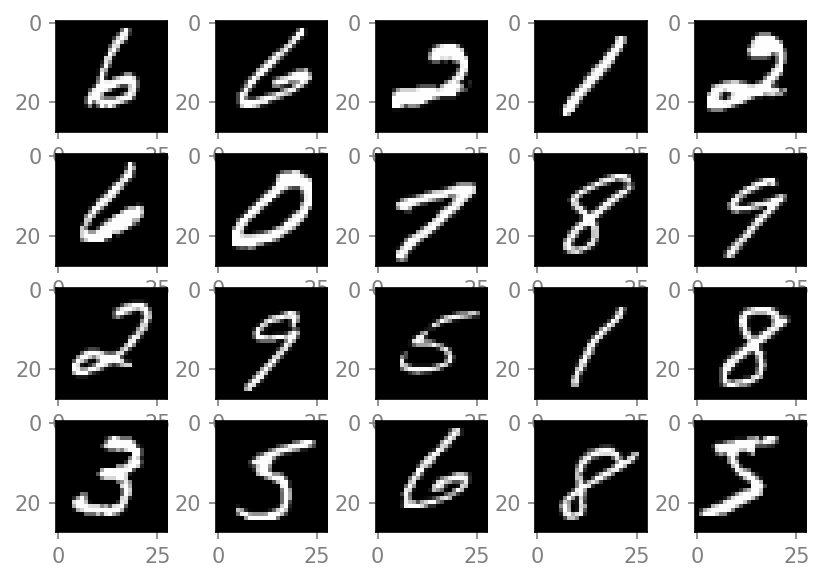

In [8]:
plt.figure(figsize=(15, 10))
for i in range(1, 21):
    plt.subplot(4, 5, i)
    np_img = np.transpose(t_data[60000 - 20 + i][0].numpy(), (1,2,0))
    plt.imshow(np_img, cmap=plt.cm.gray)

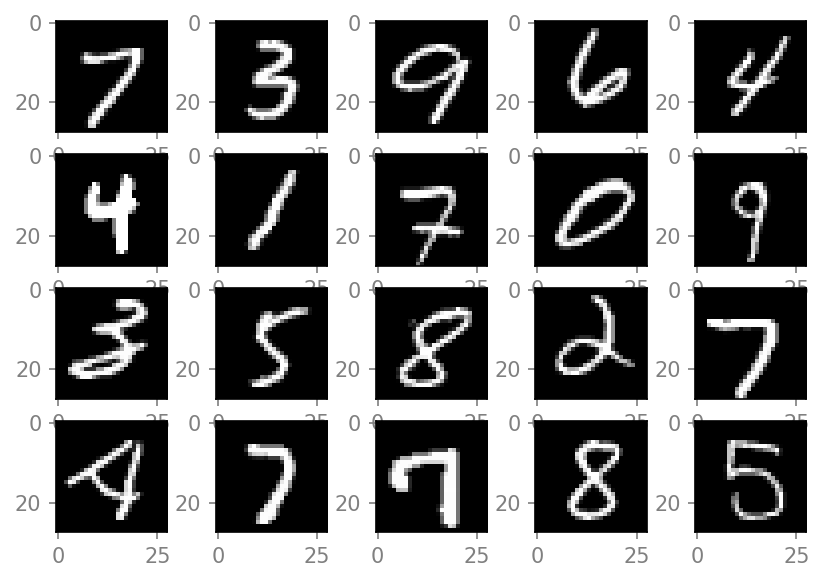

In [9]:
plt.figure(figsize=(15, 10))
for i in range(1, 21):
    plt.subplot(4, 5, i)
    np_img = np.transpose(t_data[30000 + i][0].numpy(), (1,2,0))
    plt.imshow(np_img, cmap=plt.cm.gray)

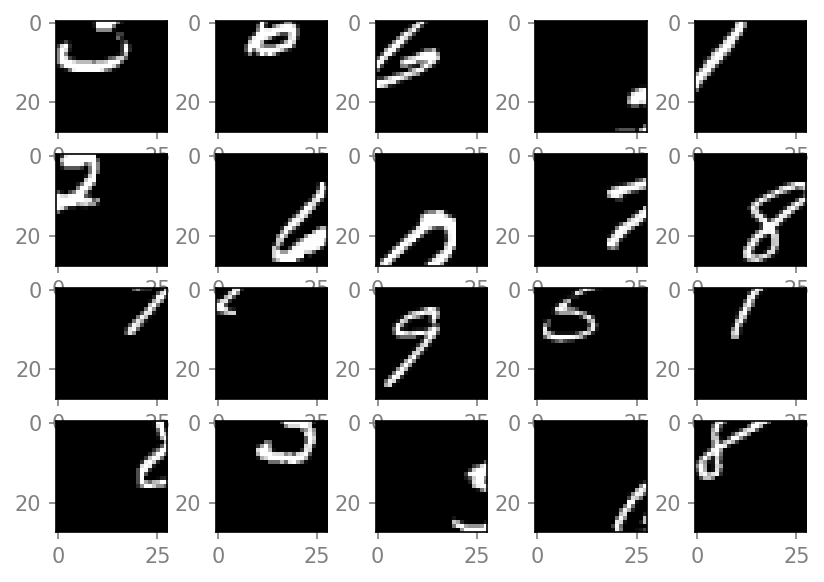

In [10]:
plt.figure(figsize=(15, 10))
for i in range(1, 21):
    plt.subplot(4, 5, i)
    np_img = np.transpose(t_data[119999 - 20 + i][0].numpy(), (1,2,0))
    plt.imshow(np_img, cmap=plt.cm.gray)